## **使用 Stanford NER**



*   安裝 python 相關套件
*   安裝繁體中文相關檔案
*   功能探索



## Quiz-1 : 這次真的要來給一則新聞來做 NER 分析了！請將 NER 結果畫成的文字雲，和用 nltk tokenize 後的文字雲，比較一下。

In [1]:
# Quiz-1 : 請將 NER 結果畫成的文字雲，和用 nltk tokenize 後的文字雲，比較一下。


In [2]:
!pip install stanfordnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 5.7 MB/s eta 0:00:00


Stanford NER Refence: https://nlp.stanford.edu/software/CRF-NER.shtml#Download

* 3 class:	Location, Person, Organization
* 4 class:	Location, Person, Organization, Misc
* 7 class:	Location, Person, Organization, Money, Percent, Date, Time

Stanford NER model download : https://nlp.stanford.edu/software/stanford-ner-4.2.0.zip

In [3]:
!wget https://nlp.stanford.edu/software/stanford-ner-4.2.0.zip

!unzip stanford-ner-4.2.0.zip

--2023-04-23 13:51:04--  https://nlp.stanford.edu/software/stanford-ner-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-ner-4.2.0.zip [following]
--2023-04-23 13:51:04--  https://downloads.cs.stanford.edu/nlp/software/stanford-ner-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180437064 (172M) [application/zip]
Saving to: ‘stanford-ner-4.2.0.zip’

stanford-ner-4.2.0. 100%[===================>] 172.08M  4.99MB/s    in 30s     

2023-04-23 13:51:34 (5.70 MB/s) - ‘stanford-ner-4.2.0.zip’ saved [180437064/180437064]

Archive:  stanford-ner-4.2.0.zip
   creating: stanford-ner-

In [4]:
#CORENLP_HOME='./stanford-corenlp-full-2018-02-27'

import os
os.environ["CORENLP_HOME"] = r'/content/stanford-ner-2020-11-17'

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

#eng_path = '/content/stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz'
#eng_path = '/content/stanford-ner-2020-11-17/classifiers/english.conll.4class.distsim.crf.ser.gz'
eng_path = '/content/stanford-ner-2020-11-17/classifiers/english.muc.7class.distsim.crf.ser.gz'
jar_path = '/content/stanford-ner-2020-11-17/stanford-ner.jar'

st = StanfordNERTagger(eng_path, path_to_jar = jar_path)

test_str1 = 'The brown fox is quick and he is jumping over the lazy dog'
tokenized_text = word_tokenize(test_str1)
classified_text = st.tag(tokenized_text)

print(classified_text)

[('The', 'O'), ('brown', 'O'), ('fox', 'O'), ('is', 'O'), ('quick', 'O'), ('and', 'O'), ('he', 'O'), ('is', 'O'), ('jumping', 'O'), ('over', 'O'), ('the', 'O'), ('lazy', 'O'), ('dog', 'O')]


In [6]:
# Quiz - 4 NER analysis

# url : https://edition.cnn.com/2023/03/14/business/japan-billionaire-7-eleven-masatoshi-ito-death-intl-hnk/index.html

title_CNN = 'Masatoshi Ito, Japanese billionaire behind the rise of 7-Eleven, dies at 98'
content_CNN = '''Hong Kong/Tokyo CNN — 
Masatoshi Ito, the Japanese billionaire who turned 7-Eleven convenience stores into a global empire, has died aged 98, closing the chapter on one of Asia’s most storied retail entrepreneurs.

Seven & I Holdings (SVNDF), operator of 7-Eleven, confirmed the death in a statement on Monday, adding that Ito died from old age on March 10.

“We would like to express our deepest gratitude for your kindness and friendship during his life and respectfully inform you of his passing,” the company said.

Ito transformed everyday retail in Japan, turning a US-born company into an international brand, particularly in Asia where 7-Eleven shops are rarely more than a few minutes’ walk away in many cities.

Seven & I Holdings now operates over 83,000 stores around the world, including 7-Eleven shops in 19 regions and countries as well as the Speedway convenience store chain in the United States.

Chief competitors include the Japanese-owned Lawson and Family Mart convenience store franchises, but neither has reached the sheer size or global reach of the 7-Eleven empire.

Ito’s business acumen was influenced by his friendship with the late management consultant Peter Drucker, who described Ito as “one of the world’s outstanding entrepreneurs and business builders.”

In a 1988 interview with The Journal of Japanese Trade and Industry, Ito said he traveled to the US in 1960 and “experienced a kind of cultural shock at how rich everybody seemed” at a time when Japan was recovering from the aftermath of World War II.

“I became particularly conscious of the sheer size of America’s consumer society and the distribution techniques that made it all possible,” he was quoted as saying.

“It then occurred to me that people in different cultures still have basically the same desires, assuming that they are at the same of development, and I thought that Japan’s distribution system would become more like America’s as the Japanese consumer society grew bigger.”

The rise of 7-Eleven

The convenience store chain traces its origin to 1927, when several icehouse companies merged to form the Southland Ice Company in Dallas, Texas.

To reflect their extended hours of operation, the stores were renamed in 1946 as 7-Eleven: open from 7 a.m. to 11 p.m.

So, how did 7-Eleven become synonymous with the Japanese convenience store culture as we know it today?

Ito is the post-war entrepreneur credited for making it a global brand that sells everything from yoghurt to ready-made meals and medicine, through a series of acquisitions and expansions between the 1970s and 1990s.
According to state broadcaster NHK, Ito got his start in 1958, when he became the president of a small apparel store in Tokyo that was run by his family.

He later stared selling food and other daily necessities. He renamed the company Ito Yokado and started running the business like a US supermarket.

Ito Yokado later forged a deal with 7-Eleven’s owner, the Southland Corporation, and opened Japan’s first 7-Eleven in Tokyo in 1974.

His firm then acquired a controlling stake in Southland in March 1991. A year later Ito resigned as president of Ito Yokado “to take responsibility for alleged payoffs to racketeers by company officials,” according to NHK.

Ito Yokado was renamed Seven & I Holdings in 2005, and Ito remained its honorary chairman until his death.

Looking back at 7-Eleven’s success, Ito was quoted as saying in the 1988 interview: “I am frequently asked if I succeeded because of hard work or because I was just lucky. The answer is some of both.”
'''

In [7]:
# NER analysis

text_tokenized = word_tokenize(content_CNN)
text_classified = st.tag(text_tokenized)

#print(text_classified)
ner_classified = []
for ner, ner_type in text_classified:
    if ner_type != 'O' :
        print( (ner, ner_type) )
        ner_classified.append((ner, ner_type))

('Masatoshi', 'PERSON')
('Ito', 'PERSON')
('Asia', 'LOCATION')
('Monday', 'DATE')
('Ito', 'PERSON')
('March', 'DATE')
('10', 'DATE')
('Japan', 'LOCATION')
('Asia', 'LOCATION')
('United', 'LOCATION')
('States', 'LOCATION')
('Lawson', 'PERSON')
('Peter', 'PERSON')
('Drucker', 'PERSON')
('Ito', 'PERSON')
('1988', 'DATE')
('Ito', 'PERSON')
('US', 'LOCATION')
('1960', 'DATE')
('Japan', 'LOCATION')
('America', 'LOCATION')
('Japan', 'LOCATION')
('America', 'LOCATION')
('1927', 'DATE')
('Southland', 'ORGANIZATION')
('Ice', 'ORGANIZATION')
('Company', 'ORGANIZATION')
('Dallas', 'LOCATION')
('Texas', 'LOCATION')
('1946', 'DATE')
('7', 'TIME')
('a.m.', 'TIME')
('1970s', 'DATE')
('1990s', 'DATE')
('NHK', 'ORGANIZATION')
('Ito', 'PERSON')
('1958', 'DATE')
('Tokyo', 'LOCATION')
('Ito', 'PERSON')
('Yokado', 'PERSON')
('US', 'LOCATION')
('Ito', 'PERSON')
('Yokado', 'PERSON')
('Southland', 'ORGANIZATION')
('Corporation', 'ORGANIZATION')
('Japan', 'LOCATION')
('Tokyo', 'LOCATION')
('1974', 'DATE')
('Sou

In [8]:
# 試著用 NER 結果，歸納單字頻率
freq_word = nltk.FreqDist(ner_classified)

topk = 20
print(f'排名前 {topk} 名的字頻：', freq_word.most_common(topk))


排名前 20 名的字頻： [(('Ito', 'PERSON'), 12), (('Japan', 'LOCATION'), 4), (('Yokado', 'PERSON'), 4), (('Southland', 'ORGANIZATION'), 3), (('Asia', 'LOCATION'), 2), (('March', 'DATE'), 2), (('1988', 'DATE'), 2), (('US', 'LOCATION'), 2), (('America', 'LOCATION'), 2), (('NHK', 'ORGANIZATION'), 2), (('Tokyo', 'LOCATION'), 2), (('Masatoshi', 'PERSON'), 1), (('Monday', 'DATE'), 1), (('10', 'DATE'), 1), (('United', 'LOCATION'), 1), (('States', 'LOCATION'), 1), (('Lawson', 'PERSON'), 1), (('Peter', 'PERSON'), 1), (('Drucker', 'PERSON'), 1), (('1960', 'DATE'), 1)]


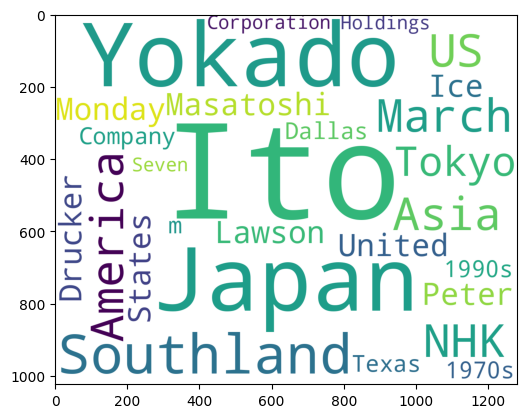

In [9]:
# 試畫文字雲
from wordcloud import WordCloud
import matplotlib.pyplot as plt

width=1280
height=1024
bg='white'
angle=0.9

# 只取 NER，不管 type
text = ' '.join( [tup[0] for tup in ner_classified] )
cloud = WordCloud(background_color = bg, width=width, height=height).generate(text)
plt.imshow(cloud)

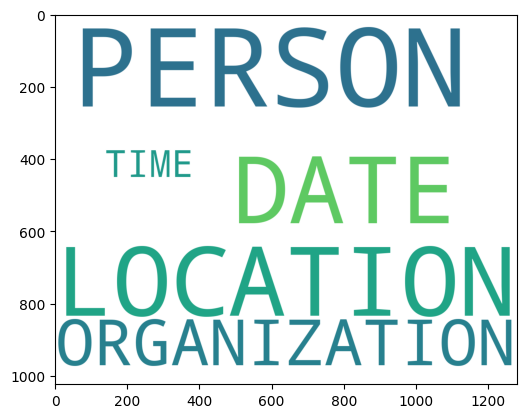

In [10]:
# 如果只關心哪個 type 比較多
nertype = ' '.join( [tup[1] for tup in ner_classified] )
cloud = WordCloud(background_color = bg, width=width, height=height).generate(nertype)
plt.imshow(cloud)

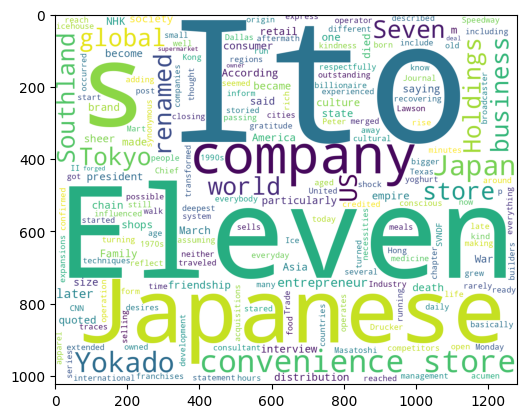

In [11]:
# 要跟 tokenize 的結果，比較一下？

# 試畫文字雲
from wordcloud import WordCloud
import matplotlib.pyplot as plt

width=1280
height=1024
bg='white'
angle=0.9

# 和 NER 結果比較一下？
text = ' '.join( text_tokenized )
cloud = WordCloud(background_color = bg, width=width, height=height).generate(text)
plt.imshow(cloud)